In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy import stats

## You can see in the comment section for this data, the most frequently the question is; *what is the time attribute?*

# Survival analysis with Python in medical data

## Survival Analysis with Kaplan Meier estimator


The Kaplan–Meier estimator is a non-parametric statistic used to estimate the survival function from lifetime data. In medical research, it is often used to gauge the part of patients living for a specific measure of time after treatment.

Now let’s familiarise ourselves with the conceptual knowledge. The Kaplan-Meier curve is the visual representation of the Kaplan-Meier estimator which makes the following assumptions:

* Censorship: Censored observations have the same survival prospects as uncensored observations.
* Study entry time: Survival probabilities are the same for observations recruited early and later in the study.
* Event time: Event happened at the defined time




The Kaplan-Meier estimator is defined by the following formula:

![formula](https://miro.medium.com/max/450/1*7mFE_3uLKTnZ8LGVfogL5w.png)

![](https://i.imgur.com/EOowdSD.png)

lifelines is a complete survival analysis library, written in pure Python.
[For API page](https://lifelines.readthedocs.io/en/latest/)

Kaplan-Meier curve can be plotted using the KaplanMeierFitter object in a handful of lines:

In [2]:
!pip install lifelines
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.5/349.5 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 kB 3.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=cf6fd907b8cd81d3cd3f71a462ff8e368f6d9dc40b2d0802591c400832af4077
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma


In [3]:
df = pd.read_csv("../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")

For this estimation, we need the followup duration of each patient and their observed death events.

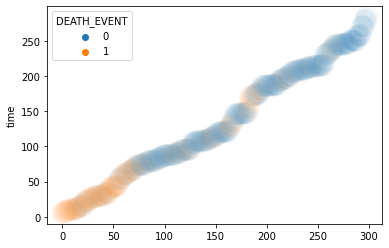

In [4]:
sns.scatterplot(x=df.index,y=df.time,hue=df.DEATH_EVENT,alpha=.05,s=500)
plt.show()

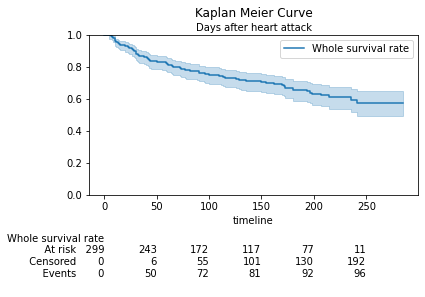

In [5]:
#Kaplan Meier Curve
# From the lifelines library, we’ll need the KaplanMeierFitter for this exercise:
kmf = KaplanMeierFitter()
# For plot
ax = plt.subplot(111)
# Duration of observations
X = df.time
# Death events
Y = df.DEATH_EVENT
# We next use the KaplanMeierFitter method fit() to fit the model to the data. 
kmf.fit(X, event_observed = Y, label = 'Whole survival rate')
# The property is a Pandas DataFrame, so we can call plot() on it:
kmf.plot(ax = ax,at_risk_counts=True)
plt.title("Kaplan Meier Curve")
plt.xlabel("Days after heart attack")
plt.ylabel("Survival")
plt.ylim([0,1])
plt.show()

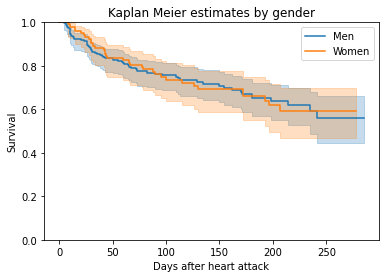

In [6]:
ax = plt.subplot(111)
X = df[df.sex==1].time
Y = df[df.sex==1].DEATH_EVENT
kmf.fit(X, event_observed = Y, label = 'Men')
kmf.plot(ax = ax)
X = df[df.sex==0].time
Y = df[df.sex==0].DEATH_EVENT
kmf.fit(X, event_observed = Y, label = 'Women')
kmf.plot(ax = ax)
plt.title("Kaplan Meier estimates by gender")
plt.xlabel("Days after heart attack")
plt.ylabel("Survival")
plt.ylim([0,1])
plt.show()

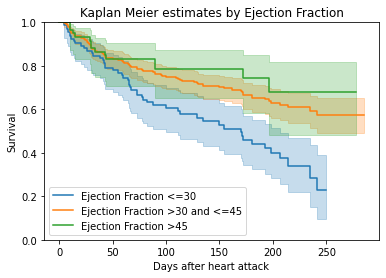

In [7]:
ax = plt.subplot(111)
X = df[df.ejection_fraction<=30].time
Y = df[df.ejection_fraction<=30].DEATH_EVENT
kmf.fit(X, event_observed = Y, label = 'Ejection Fraction <=30')
kmf.plot(ax = ax)

X = df[(df.ejection_fraction>30)|(df.ejection_fraction<=45)].time
Y = df[(df.ejection_fraction>30)|(df.ejection_fraction<=45)].DEATH_EVENT
kmf.fit(X, event_observed = Y, label = 'Ejection Fraction >30 and <=45')
kmf.plot(ax = ax)

X = df[df.ejection_fraction>45].time
Y = df[df.ejection_fraction>45].DEATH_EVENT
kmf.fit(X, event_observed = Y, label = 'Ejection Fraction >45')
kmf.plot(ax = ax)

plt.title("Kaplan Meier estimates by Ejection Fraction")
plt.xlabel("Days after heart attack")
plt.ylabel("Survival")
plt.ylim([0,1])
plt.show()

You can compare Kaplan Meier Curves in this [articles](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0181001)




![kaplan_meier](https://journals.plos.org/plosone/article/figure/image?size=large&id=10.1371/journal.pone.0181001.g001)

In [8]:
ht_dm = []
for i in range(len(df)):
    if df.diabetes.iloc[i] == 0 and df.high_blood_pressure.iloc[i] == 0:
        ht_dm.append("Healthy")
    elif df.diabetes.iloc[i] == 1 and df.high_blood_pressure.iloc[i] == 0:
        ht_dm.append("Just Diabetic")
    elif df.diabetes.iloc[i] == 0 and df.high_blood_pressure.iloc[i] == 1:
        ht_dm.append("Just hypertensive")
    else:
        ht_dm.append("Combine patient")

        
df["Diabetic_and_HT"] = ht_dm
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,Diabetic_and_HT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,Just hypertensive
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,Healthy
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,Healthy
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,Healthy
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,Just Diabetic


The function lifelines.statistics.logrank_test() is a common statistical test in survival analysis that compares two event series’ generators. If the value returned exceeds some pre-specified value, then we rule that the series have different generators.


In [9]:
from lifelines.statistics import logrank_test

T = df["time"]
E = df["DEATH_EVENT"]
partial =  df.high_blood_pressure==1
results = logrank_test(T[partial], T[~partial], E[partial], E[~partial], alpha=.99)

results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.41 0.04      4.80

* -log2 > test_statistic means that;
    * Death event is not only related to hypertension.

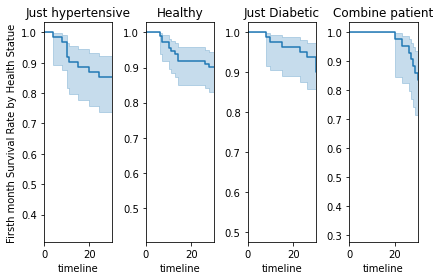

In [10]:
Diabetic_and_HT = df['Diabetic_and_HT'].unique()

for i, Diabetic_and_HT in enumerate(Diabetic_and_HT):
    ax = plt.subplot(1, 4, i + 1)

    ix = df['Diabetic_and_HT'] == Diabetic_and_HT
    kmf.fit(T[ix], E[ix], label=Diabetic_and_HT)
    kmf.plot_survival_function(ax=ax, legend=False)

    plt.title(Diabetic_and_HT)
    plt.xlim(0,30)

    if i==0:
        plt.ylabel('Firsth month Survival Rate by Health Statue')

plt.tight_layout()

# To be contunied
### By the way, most voted notebooks use this time feature for model training. This feauture dosnt for model developping.